In [77]:
%load_ext autoreload
%autoreload 2

from main import Crop, UserInput, RunConfig

from sentier_data_tools import (
    DatasetKind,
    Demand,
    Flow,
    FlowIRI,
    GeonamesIRI,
    ModelTermIRI,
    ProductIRI,
    SentierModel,
)
from sentier_data_tools.iri import ProductIRI#, GeonamesIRI
#from sentier_data_tools.model import SentierModel
import DirectFertiliserEmission as dfe


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
product_iri = ProductIRI("http://data.europa.eu/xsp/cn2024/100500000080")
amount = 7
unit = ProductIRI("https://vocab.sentier.dev/units/unit/KiloGM")

In [79]:
product_iri

<http://data.europa.eu/xsp/cn2024/100500000080>: 1005 Maize (corn) (product)

In [80]:
user_input = UserInput(
    product_iri=product_iri,
    unit = unit,
    amount=amount
    #climate_type ='wet'
)

In [81]:
user_input

UserInput(product_iri=<http://data.europa.eu/xsp/cn2024/100500000080>: 1005 Maize (corn) (product), unit=<https://vocab.sentier.dev/units/unit/KiloGM>: Missing label (product), amount=7.0, crop_yield_val=None, fertilizer_amount=None, climate_type=None, spatial_context=GeonamesIRI('https://sws.geonames.org/2782113'), year='2018', begin_date=None, end_date=None)

In [82]:
run_config = RunConfig()

In [83]:
crop = Crop(user_input = user_input, run_config = run_config)

crop.get_model_data()

In [84]:
agridata = crop.get_master_db()

AttributeError: 'Crop' object has no attribute 'get_master_db'

In [85]:
from sentier_data_tools.local_storage.db import Dataset
for ds in agridata["exactMatch"]:
    #print(type(ds.location)) #
    if ds.location == GeonamesIRI("https://sws.geonames.org/3469034"):
        print(ds.dataframe)

NameError: name 'agridata' is not defined

In [86]:
crop.crop_yield_data

AttributeError: 'Crop' object has no attribute 'crop_yield_data'

In [87]:
from function import format_df

for i in agridata["exactMatch"]:
    display(i.columns)

NameError: name 'agridata' is not defined

In [109]:
resulting_demands = crop.run()

10:03:03 [info     ] Retrieved 17 triples from https://fuseki.d-d-s.ch/skosmos/query
10:03:03 [info     ] Retrieved 7 triples from https://fuseki.d-d-s.ch/skosmos/query
10:03:03 [info     ] Retrieved 17 triples from https://fuseki.d-d-s.ch/skosmos/query
10:03:03 [info     ] Retrieved 7 triples from https://fuseki.d-d-s.ch/skosmos/query


INFO: Getting climate


10:03:04 [info     ] Retrieved 17 triples from https://fuseki.d-d-s.ch/skosmos/query
10:03:04 [info     ] Retrieved 7 triples from https://fuseki.d-d-s.ch/skosmos/query


INFO: fertilizer amount: 0.0105


10:03:04 [info     ] Retrieved 17 triples from https://fuseki.d-d-s.ch/skosmos/query
10:03:04 [info     ] Retrieved 7 triples from https://fuseki.d-d-s.ch/skosmos/query


INFO: Set input data: https://vocab.sentier.dev/model-terms/crop_yield
INFO: crop yield: 0.101493
INFO: Emission factor:   climate_type fert_type value_type  emission_factor
3      default   default      value            0.010
4      default   default        min            0.001
5      default   default        max            0.018 for broader concept
INFO: Getting emission from fertilizer


In [94]:
resulting_demands

,climate_type,fert_type,value_type,emission_factor,fertiliser_input,N2O emission,N2O emission per ha
3,default,default,value,0.010,0.0105,0.000165,1.650
4,default,default,min,0.001,0.0105,0.000017,0.165
5,default,default,max,0.018,0.0105,0.000297,2.970


In [106]:
crop.merge_datasets_to_dataframes(crop.agridata_param['broader'])

,climate_type,fert_type,value_type,emission_factor,fertiliser_input,N2O emission,N2O emission per ha
3,default,default,value,0.010,0.0105,0.000165,1.650
4,default,default,min,0.001,0.0105,0.000017,0.165
5,default,default,max,0.018,0.0105,0.000297,2.970


In [103]:
result = Dataset.select().where(
                    Dataset.kind == DatasetKind.BOM,
                    Dataset.columns == "http://data.europa.eu/xsp/cn2024/310200000080"
                )
print(result.dataframe)

AttributeError: 'ModelSelect' object has no attribute 'dataframe'

value_type,Name,max,min,value,e_minus,e_plus
0,N2O emissions from mineral fertiliser,0.000297,0.000016,165.0,148.5,132.0


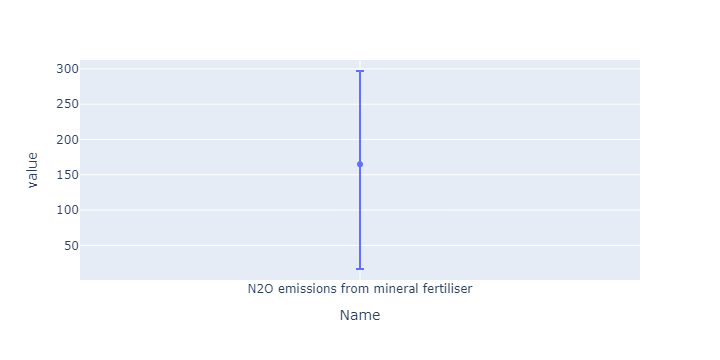

In [63]:
res = resulting_demands
res["Name"] = "N2O emissions from mineral fertiliser"
res = res.set_index(["Name", "value_type"])
res = res[["emission [kg_N20/ha]"]].unstack("value_type").reset_index()
res.columns = res.columns.droplevel()
res.rename( columns={'':'Name'}, inplace=True )
res.value = res.value * 1e6
res["e_minus"] = res.value - res["min"] * 1e6
res["e_plus"] = res["max"] * 1e6 - res.value
display(res)

import plotly.express as px

fig = px.scatter(res, x="Name", y="value", error_y="e_plus", error_y_minus="e_minus")
fig.show()

# Main tst SentierModel

In [ ]:
import sentier_data_tools

In [ ]:
sentier_data_tools.__version__

In [ ]:
%run main_tst.py

# n2OToAirInorganicFertiliserDirect_dev.py

In [ ]:
import n2OToAirInorganicFertiliserDirect_dev as n2o

In [ ]:
import pandas as pd

In [ ]:
product_iri = ProductIRI("http://data.europa.eu/xsp/cn2024/100500000080")

In [ ]:
run(product_iri, 7)

# function.py

In [ ]:
from sentier_data_tools.iri import ProductIRI

In [ ]:
import function

In [ ]:
product_iri = ProductIRI("http://data.europa.eu/xsp/cn2024/100500000080")

In [ ]:
product_iri.display()

In [ ]:
unique_product = [ product_iri.broader()[0], product_iri.broader()[1], product_iri.narrower()[0]]

In [ ]:
unique_product

In [ ]:
match_IRI = function.find_match_IRI(product_iri, unique_product)

In [ ]:
df = pd.read_csv("../docs/EF.csv", sep=';')
productIRI_columns_list = ['crop_iri', 'fert_iri']

df[productIRI_columns_list] = df[productIRI_columns_list].map(lambda x : ProductIRI(x))

In [ ]:
df['crop_iri'][0]

In [ ]:
df_emission_factors['crop_iri'][0]